# Converting and Transforming Raw Data
In this activity, we deal with the raw data from Pew Research Center, where the tasks are to clean the data and plot meaningful relations between two or more variables in the data. For the purpose of this activity, I am using the following two libraries:
* dplyr (for dealing with data)
* ggplot2 (for plotting graphs using qplot)

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Reading the Data and factoring
Factoring the Gender and the Income with respective labels in the main data frame

In [2]:
data <- read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

In [3]:
data$sexfactor <- factor(data$sex, labels = c("Male","Female"))
data$incgroup <- factor(data$inc, labels = c("Less than $10k","$10k-20k","$20k-30k","$30k-40k","$40k-50k","$50k-75k","$75k-100k","$100k-150k","More than $150k","Don't Know", "Refused"))

## Grouping Ages into Bins
Grouping the ages of all the users in certain ranges using the information provided in the survey questionnaire and saving it into a new data frame to be used below.

In [4]:
data_with_age <- subset(data, age!=98 | age!=99 | !is.na(age))
data_with_age$ageGroup <- cut(data_with_age$age, c(-Inf,17,25,40,55,80,96,Inf))

## Plot 1: Relation between Internet users and Internet on Phone users
This is a plot depicting the relation between the users who use internet overall to check emails or surf generally and the users who use internet on their phones. This result is grouped by their age groups to get a very intersting inference for the customers who were surveyed.

**Inference:** Most of the users up to the age of 55 also use internet on their phones whereas the users who are more than 55 years old show a different sign where a small percentage of customers don't use internet on the phone. One more thing that is interesting in this plot is that the results are fairly consistent across the both genders. 

**Process:**
* Select all the users who say they use internet into a new Data Frame
* Then, select all users who replied either yes or no to using internet on their phones
* Factor the mobile usage into a new column with Yes and No labels
* Copy the factored column called sexfactor into sex to make it presentable for plotting

In [5]:
dataPlot <- data_with_age[data_with_age$eminuse ==1,]
dataPlot <- subset(dataPlot, intmob == 1 | intmob == 2)
dataPlot$MobileInternet <- factor(dataPlot$intmob, labels =c("Yes","No"))
dataPlot$sex <- dataPlot$sexfactor

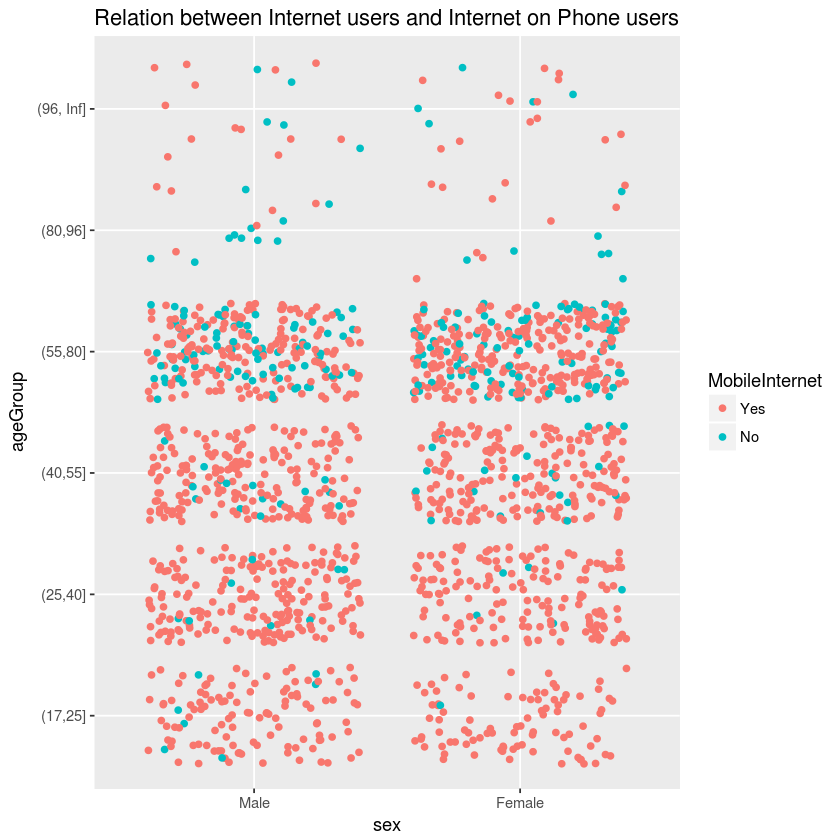

In [6]:
qplot(sex, ageGroup, color = MobileInternet, data = dataPlot, geom = "jitter", main = "Relation between Internet users and Internet on Phone users")

## Plot 2: Relation between Income and owning a smartphone in different Age Groups
This is a plot depicting the relation between the users who own a smartphone and their respective income. This is further categorized by their age group so as to get a better idea about the owners of smartphones in various income and age groups. The results of this plot are again interesting and tell us something about the society we live in.

**Inference:** Up to the age group of 40, most of the people irrespective of their income own a smartphone whereas after the age of 40, this starts to change. Between the age groups of 40 and 55, there are some people with lower incomes who do not own a smartphone but as their income increases, this number starts to go down. Finally for the people who are older than 55 years, there is a certain trend that most of the people earning upto $50k do not own a smartphone, where as in the higher income ranges, this result reverses itself and more people own smartphones. These can be the people who own businesses and use their smartphones to power their day to day lives.

**Process:**
* Select all the users who responded yes or no to owning a smartphone into a new data frame
* Then, select all users who provided their income range from the above data frame
* Factor the Smartphone owning into a new column called smartphone with respective labels for plotting

In [7]:
dataPlot <- subset(data_with_age, smart1 == 1 | smart1 == 2)
dataPlot <- subset(dataPlot, inc!=98 | inc!= 99)
dataPlot$Smartphone <- factor(dataPlot$smart1, labels = c("Yes","No"))

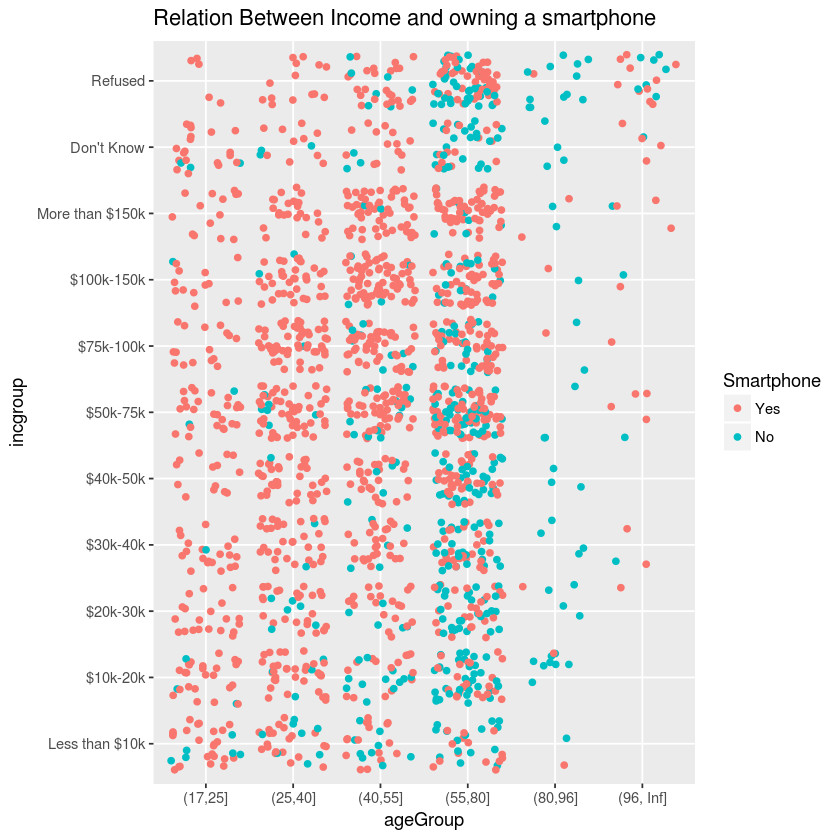

In [8]:
qplot(ageGroup, incgroup, color = Smartphone, data = dataPlot, geom = "jitter", main = "Relation Between Income and owning a smartphone")

## Plot 3: Relation between Internet at Home and Cable Subscription
This is a plot depicting the relation between the users who have a Cable TV subscription at home grouped by their age category and the availability of internet at their homes. The inference from this graph can be made about the internet offerings by ISPs in the country.

**Inference:** Most of the users who subscribe to internet at home, also subscribe to cable TV at home which shows that the internet service provider offers a bundle for internet and Cable TV in most areas. As for the people who do not subscribe to internet at home, up to the age of 40, most of these people don't even subscribe to cable TV at home whereas after the age of 40, most of the people subscribe to cable TV even if they do not have internet connectivity at home.

**Process:**
* Select all the users who responded yes or no to having an internet connection at home into a new Data frame
* Then, select all who responded yes or no to having an active Cable TV subscription
* Finally, factor the 2 above selected columns into new columns with proper name for plotting
* Also copy the sex of the customer into the sex column from the sexfactor column.

In [9]:
dataPlot <- subset(data_with_age, home4nw == 1 | home4nw == 2)
dataPlot <- subset(dataPlot, cable1 == 1 | cable1 == 2)
dataPlot$internet <- factor(dataPlot$home4nw, labels = c("Yes","No"))
dataPlot$cable <- factor(dataPlot$cable1, labels = c("Yes","No"))
dataPlot$sex <- dataPlot$sexfactor

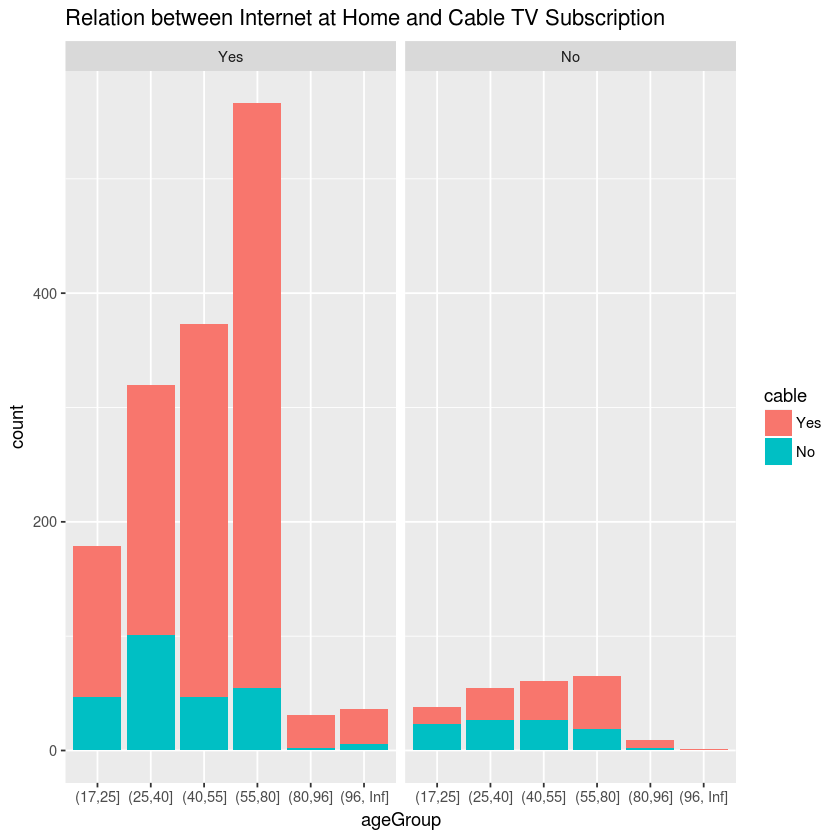

In [10]:
qplot(ageGroup, data = dataPlot, geom = "bar", fill = cable, facets = .~internet, main = "Relation between Internet at Home and Cable TV Subscription")

## Plot 4: Relation between Internet users and people who game
This is a plot depicting the relation between the users who have internet connectivity at home and also play video games. The comparison of these two variables gives us the relation between internet and gaming, say playing online games.

**Inference:** Most of the users, upto an age of 60, who have an internet connection at home say that they game as well whereas people who don't have an internet connection at home have mixed results. These people may either be gaming online on their phones or just playing games on their computers.

**Process:**
* Select all the users who responded yes or no to having an internet connection at home into a new data frame
* Then, select all users who responded yes or no to playing games
* Remove the users whose age data is unknown so that plot is clean.
* Factor the columns for people who have internet and people who game into 2 new variables.

In [11]:
dataPlot <- subset(data, home4nw == 1 | home4nw == 2)
dataPlot <- subset(dataPlot, game1 == 1 | game1 == 2)
dataPlot <- dataPlot[!is.na(dataPlot$age),]
dataPlot$internet <- factor(dataPlot$home4nw, labels = c("Yes","No"))
dataPlot$gaming <- factor(dataPlot$game1, labels = c("Yes","No"))

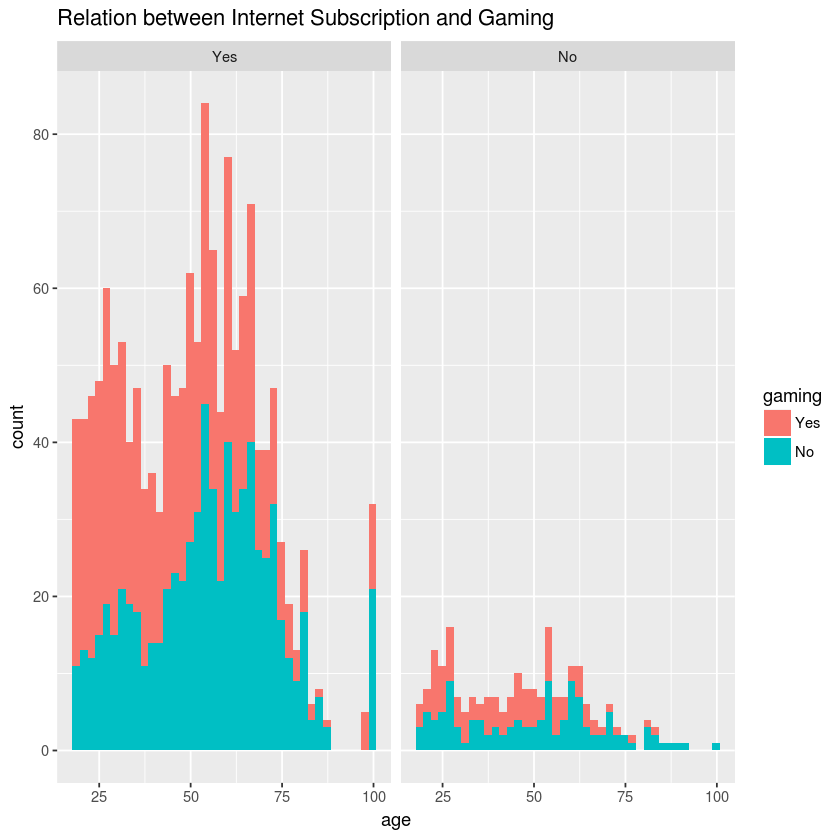

In [12]:
qplot(age, data = dataPlot, geom = "histogram", facets = .~internet, fill = gaming, bins = 40, main = "Relation between Internet Subscription and Gaming")

## Plot 5: Importance of Smartphone for Job Search for people who use them for that
This is a plot depicting the relation between the users who use their smartphones for searching for a job and the importance of their smartphone when searching for a job. The inference from this plot is also very interesting to see.

**Inference:** Most of the users, who use their smartphone for job search, irrespective of their age group say that  their smartphone is at least somewhat important to their job search. There is only a small fraction of users in all the age groups who do not find it to use their smartphone for job search as important.

**Process:**
* Select all the users who own a smartphone and use their smartphone for job search into a new data frame
* Then, select all users who responded to the importance of their smartphone with an importance level i.e. importance level is at max 4
* Finally, factor the importance of each user using appropriate labels

In [13]:
dataPlot <- subset(data_with_age, smart1 == 1 & smjob1 == 1)
dataPlot <- dataPlot[dataPlot$smjob3 < 5,]
dataPlot$importance <- factor(dataPlot$smjob3, labels = c("Very Important","Somewhat Important","Not Too Important","Not at all important"))

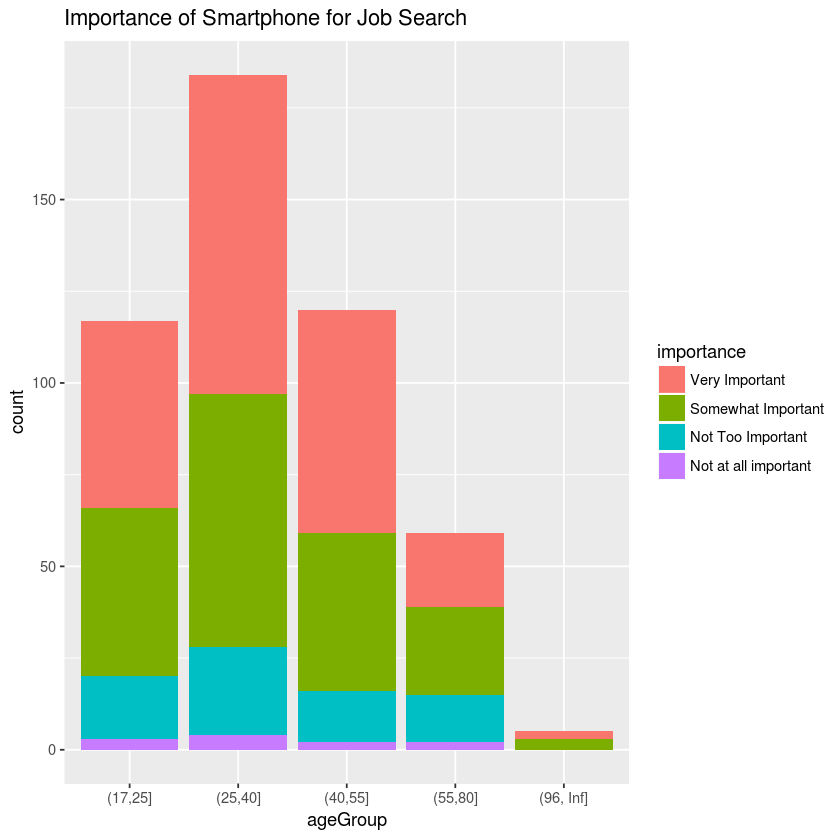

In [14]:
qplot(ageGroup, data = dataPlot, geom = "bar", fill = importance, main = "Importance of Smartphone for Job Search")

## Plot 6: Relation between users with a cellphone and landline at their homes
This is a plot depicting the relation between the users who own a cellphone and whether they own any other working landline phones at their home or not. The plot for this relation is particularly interesting for me, which shows a trend of these days.

**Inference:** Most of the users up to the age of 40 who own a cellphone, do not own a working landline phone in their homes, which is kind of expected from people of this age group these days. The users between the age group of 40 and 55 still have a low percentage of people who own a landline. This all reverses when we look at users above the age of 55. Most of the people older than 55 years of age also own a landline phone if they own a cellphone. 

**Process:**
* Select all the users who are being talked to on a cellphone into a new data frame
* Then, select all users who responded either Yes or no for owning a working landline phone in their homes from the above data frame
* Finally, factor the owning of another phone into a new variable with Yes or no labels and copy the factored sex into the sex column.

In [15]:
data <- data_with_age[data_with_age$sample == 2,]
data <- subset(data, qc1 == 1 | qc1 == 2)
data$otherPhone <- factor(data$qc1, labels = c("Yes","No"))
data$sex <- data$sexfactor

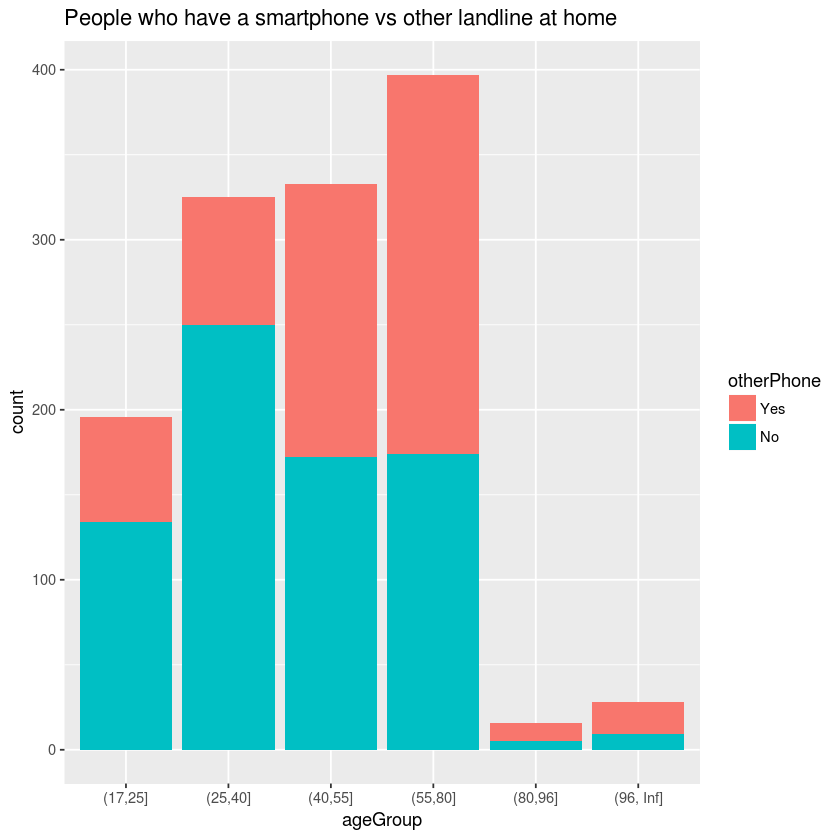

In [16]:
qplot(ageGroup, data = data, geom = "bar", fill = otherPhone, main = "People who have a smartphone vs other landline at home")